In [ ]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches



# # Define the folder path
# folder_path = '/Users/twylazhang/Desktop/Econ_Health_Research/data'

# # Use glob to search recursively for files with 'pivot' in the file name (case-insensitive)
# files = glob.glob(os.path.join(folder_path, '**', '*pivot*'), recursive=True)

# # Print all matching file names
# print("Files with 'pivot' in their name (including pre-2012 folder):")
# for file in files:
#     print(os.path.basename(file))

# Preprocessing

## Section 1: Importing and Filtering Data 

#### Data Exclusion Due to Inconsistent Capitalization and Terminology

In all years, variations in values and capitalization between "General Acute" and "General," as well as inconsistent capitalization, resulted in some data being excluded from the final combined dataset. Specifically, the filter only captured records that matched the exact terms "General Acute" or "GENERAL ACUTE," leading to some relevant data being omitted.

To ensure that all relevant records are included, the filter should account for:
- Variations in capitalization (e.g., "General Acute," "GENERAL ACUTE")
- Different forms of the same term (e.g., "General" instead of "General Acute")

Additionally, only hospitals that meet the following criteria should be included:
- **TYPE_HOSP**: Comparable hospitals only
- **TYPE_CARE**: General Acute or its variations

By adjusting the filter to handle these variations, the dataset will be more complete and accurate for analysis.

In [2]:
def filter_hospitals(df):
    """
    Filter hospitals by:
    - Including hospitals with 'GENERAL ACUTE' or 'GENERAL' in the TYPE_CARE column, regardless of TYPE_HOSP
    """
    # Standardize capitalization
    df['TYPE_CARE'] = df['TYPE_CARE'].str.upper()
    
    return df[
        df['TYPE_CARE'].isin(['GENERAL ACUTE', 'GENERAL'])
    ]

# Define the base folder path where all files are located
folder_path = '/Users/twylazhang/Desktop/Econ_Health_Research/data_need'

# List to store dataframes for each year
dataframes = []
years = []

# Loop over each file in the folder and import the data
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Extract the year from the file name
    try:
        year = int(file_name.split('-')[0])  # Assuming the year is the first part of the file name
    except ValueError:
        print(f"Could not extract a valid year from file name: {file_name}")
        continue
    
    # Import the file as a dataframe
    try:
        if file_name.endswith('.xlsx'):
            df = pd.read_excel(file_path, sheet_name='Data', engine='openpyxl')
        else:
            df = pd.read_excel(file_path, sheet_name='Data', engine='xlrd')
    except Exception as e:
        print(f"Error reading {file_name}: {e}")
        continue
    
    # Print the number of rows before filtering
    print(f"\nYear: {year}, Rows before filtering: {len(df)}")
    
    # Print the unique values for 'TYPE_CARE' before filtering
    print(f"Unique values in 'TYPE_CARE' for {year}: {df['TYPE_CARE'].unique()}")
    
    # Add a column to identify the year
    df['Year'] = year
    
    # Filter the data based on hospital care type
    df_filtered = filter_hospitals(df)
    
    # Print the number of rows after filtering
    print(f"Year: {year}, Rows after filtering: {len(df_filtered)}")
    
    # Append the filtered dataframe and year
    if not df_filtered.empty:
        dataframes.append(df_filtered)
        years.append(year)
    else:
        print(f"No valid data in {file_name}. Skipped.")

# Concatenate all the dataframes into one
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"Total rows after combining: {len(combined_df)}")
    print(combined_df.head())
else:
    print("No valid data was imported.")

# Check if each dataframe contains data for the respective year
for year in set(years):
    print(f"Data exists for the year {year}.")


Year: 1997, Rows before filtering: 470
Unique values in 'TYPE_CARE' for 1997: ['GENERAL ACUTE' 'PSYCHIATRIC' 'SPECIALTY']
Year: 1997, Rows after filtering: 394

Year: 2001, Rows before filtering: 478
Unique values in 'TYPE_CARE' for 2001: ['SPECIALTY' 'GENERAL ACUTE' 'PSYCHIATRIC']
Year: 2001, Rows after filtering: 396

Year: 2015, Rows before filtering: 444
Unique values in 'TYPE_CARE' for 2015: ['General Acute' 'Psychiatric' 'Specialty']
Year: 2015, Rows after filtering: 351

Year: 2022, Rows before filtering: 441
Unique values in 'TYPE_CARE' for 2022: ['General Acute' 'Psychiatric' 'Specialty']
Year: 2022, Rows after filtering: 337

Year: 1996, Rows before filtering: 483
Unique values in 'TYPE_CARE' for 1996: ['GENERAL ACUTE' 'SPECIALTY' 'PSYCHIATRIC']
Year: 1996, Rows after filtering: 402
Could not extract a valid year from file name: .DS_Store

Year: 2000, Rows before filtering: 432
Unique values in 'TYPE_CARE' for 2000: ['SPECIALTY' 'GENERAL ACUTE' 'PSYCHIATRIC']
Year: 2000, Row

In [3]:
#combined_df

## Section 2: Filter and Calculate Inpatient and Outpatient Percentages

In [4]:
def calculate_percentages(df):
    """
    Calculate the gross outpatient percentage and inpatient percentage for each hospital.
    """
    df = df.copy()
    # Handle division by zero by replacing zeros in GR_PT_REV with NaN
    df['GR_PT_REV'].replace(0, pd.NA, inplace=True)
    df['Gross_Outpatient_Percentage'] = (df['GR_OP_TOT'] / df['GR_PT_REV']) * 100
    df['Gross_Inpatient_Percentage'] = (df['GR_IP_TOT'] / df['GR_PT_REV']) * 100
    return df

def overall_trend_analysis(df):
    """
    Perform overall trend analysis of gross outpatient percentage and inpatient percentage for each hospital across years.
    """
    # Calculate percentages
    df = calculate_percentages(df)
    
    # Add relevant columns, including DAY_TOT, adj pat days, and DIS_TOT alongside TEACH_RURL, DSH hosp, and lic bed size
    trend_df = df[['FAC_NO', 'FAC_NAME', 'Year', 'Gross_Outpatient_Percentage', 'Gross_Inpatient_Percentage', 
                   'TYPE_CARE', 'HSA name', 'DSH hosp', 'lic bed size', 'TEACH_RURL', 'DAY_TOT', 'adj pat days', 'DIS_TOT','county name']].copy()
    
    return trend_df

overall_trend_df = overall_trend_analysis(combined_df)

overall_trend_df

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_10465/3373548717.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GR_PT_REV'].replace(0, pd.NA, inplace=True)


,FAC_NO,FAC_NAME,Year,Gross_Outpatient_Percentage,Gross_Inpatient_Percentage,TYPE_CARE,HSA name,DSH hosp,lic bed size,TEACH_RURL,DAY_TOT,adj pat days,DIS_TOT,county name
0,106010846.0,ALAMEDA COUNTY MEDICAL CENTER,1997,29.524111,70.475889,GENERAL ACUTE,NaN,DSH,500+,TEACHING,119059.0,168935.789457,12689.0,ALAMEDA
1,106010735.0,ALAMEDA HOSPITAL,1997,24.169034,75.830966,GENERAL ACUTE,NaN,non-DSH,100-149,NaN,21247.0,28018.896724,4191.0,ALAMEDA
2,106430705.0,ALEXIAN BROTHERS HOSPITAL,1997,25.577968,74.422032,GENERAL ACUTE,NaN,DSH,150-199,NaN,45374.0,60968.504671,12281.0,SANTA CLARA
3,106190017.0,ALHAMBRA HOSPITAL - ALHAMBRA,1997,16.355364,83.644636,GENERAL ACUTE,NaN,non-DSH,100-149,NaN,33321.0,39836.385810,2765.0,LOS ANGELES
4,106010739.0,ALTA BATES MEDICAL CENTER,1997,25.772029,74.227971,GENERAL ACUTE,NaN,non-DSH,500+,NaN,133814.0,180274.360018,21885.0,ALAMEDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10542,106301188.0,WESTERN MEDICAL CENTER-ANAHEIM,2006,21.005186,78.994814,GENERAL ACUTE,13 - ORANGE COUNTY,DSH,150-199,NaN,41157.0,52100.888834,7473.0,ORANGE
10543,106301566.0,WESTERN MEDICAL CENTER-SANTA ANA,2006,13.694316,86.305684,GENERAL ACUTE,13 - ORANGE COUNTY,DSH,200-299,NaN,57806.0,66978.207742,12766.0,ORANGE
10544,106190878.0,WHITE MEMORIAL MEDICAL CENTER,2006,23.983293,76.016707,GENERAL ACUTE,11 - LOS ANGELES COUNTY,DSH,300-499,TEACHING,96107.0,126428.785643,17331.0,LOS ANGELES
10545,106190883.0,WHITTIER HOSPITAL MEDICAL CENTER,2006,33.781206,66.218794,GENERAL ACUTE,11 - LOS ANGELES COUNTY,DSH,150-199,NaN,36895.0,55716.810328,8721.0,LOS ANGELES


In [5]:
print(overall_trend_df.columns)

Index(['FAC_NO', 'FAC_NAME', 'Year', 'Gross_Outpatient_Percentage',
       'Gross_Inpatient_Percentage', 'TYPE_CARE', 'HSA name', 'DSH hosp',
       'lic bed size', 'TEACH_RURL', 'DAY_TOT', 'adj pat days', 'DIS_TOT',
       'county name'],
      dtype='object')


### Clean and Normalize 

In [6]:
# Define normalization mappings for TEACH_RURL, DSH hosp, and lic bed size columns
normalization_mappings = {
    'TEACH_RURL': {
        'TEACHING': 'Teaching',
        'SMALL/RURAL': 'Rural',
        'Small/Rural': 'Rural',
        'Rural': 'Rural',
        'Teaching': 'Teaching'
    },
    'DSH hosp': {
        'non-DSH': 'Non-DSH',
        'Non_DSH': 'Non-DSH'
    },
    'lic bed size': {
        '200 - 299': '200-299',
        '1 - 49': '1-49',
        '100 - 149': '100-149',
        '300 - 499': '300-499',
        '150 - 199': '150-199',
        '50 - 99': '50-99',
        '500 +': '500+',
        'False': None,
        ' ': None
    }
}

# Normalize the TEACH_RURL, DSH hosp, and lic bed size columns
for column, mapping in normalization_mappings.items():
    overall_trend_df[column] = overall_trend_df[column].replace(mapping).str.strip()

# Remove any rows with NaN or empty values in 'lic bed size'
overall_trend_df = overall_trend_df[overall_trend_df['lic bed size'].notna() & (overall_trend_df['lic bed size'] != '')]

# Check the unique values after normalization
for column in normalization_mappings.keys():
    unique_values = overall_trend_df[column].unique()
    print(f"Updated unique values in '{column}' column:")
    print(unique_values)

Updated unique values in 'TEACH_RURL' column:
['Teaching' nan 'Rural']
Updated unique values in 'DSH hosp' column:
['DSH' 'Non-DSH']
Updated unique values in 'lic bed size' column:
['500+' '100-149' '150-199' '50-99' '200-299' '300-499' '1-49']


In [7]:
# Standardize HSA names to resolve duplicates and inconsistencies
overall_trend_df['HSA name'] = overall_trend_df['HSA name'].str.strip().str.lower()

# Resolve duplicate "08 - midcoast" entries by combining them into a single name
overall_trend_df['HSA name'] = overall_trend_df['HSA name'].replace({
    '08 - midcoast': '08 - mid-coast',
    '08 - mid-coast': '08 - mid-coast'  
})

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_10465/251390379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_trend_df['HSA name'] = overall_trend_df['HSA name'].str.strip().str.lower()
/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_10465/251390379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_trend_df['HSA name'] = overall_trend_df['HSA name'].replace({


merge with caseMix

In [8]:
casemixindex_df = pd.read_excel('/Users/twylazhang/Desktop/Econ_Health_Research/casemix data/casemixindex_1996_2023.xlsx')

In [9]:
import pandas as pd
import re

# Function to clean and standardize hospital names
def standardize_name(name):
    if pd.isna(name):
        return name
    name = name.lower()  # Convert to lowercase
    name = name.strip()  # Strip leading/trailing whitespace
    name = re.sub(r'[^a-z0-9\s]', '', name)  # Remove special characters
    return name

# Apply standardization to both DataFrames before merging
casemixindex_df['HOSPITAL'] = casemixindex_df['HOSPITAL'].apply(standardize_name)
overall_trend_df['FAC_NAME'] = overall_trend_df['FAC_NAME'].apply(standardize_name)

# Separate FY and CY columns for transformation
fy_data = casemixindex_df.filter(regex='FY').copy()
cy_data = casemixindex_df.filter(regex='CY').copy()

# Melt FY data to long format, keeping relevant identifying columns
fy_data_long = casemixindex_df.melt(id_vars=['COUNTY', 'OSHPD_ID', 'HOSPITAL'], 
                                    value_vars=fy_data.columns, 
                                    var_name='Year', 
                                    value_name='FY_Score')

# Melt CY data to long format, keeping relevant identifying columns
cy_data_long = casemixindex_df.melt(id_vars=['COUNTY', 'OSHPD_ID', 'HOSPITAL'], 
                                    value_vars=cy_data.columns, 
                                    var_name='Year', 
                                    value_name='CY_Score')

# Extract only the year number from the 'Year' column for both FY and CY data
fy_data_long['Year'] = fy_data_long['Year'].str.extract(r'(\d{4})').astype(int)
cy_data_long['Year'] = cy_data_long['Year'].str.extract(r'(\d{4})').astype(int)

# Merge FY and CY data on all key columns, including Year, to combine them
casemixindex_df_long = pd.merge(fy_data_long, cy_data_long, 
                                on=['COUNTY', 'OSHPD_ID', 'HOSPITAL', 'Year'], 
                                how='outer')

# Merge the standardized FY and CY data with the overall trend data based on hospital name and year
overall_trend_df = pd.merge(overall_trend_df, casemixindex_df_long, 
                            left_on=['FAC_NAME', 'Year'], 
                            right_on=['HOSPITAL', 'Year'], 
                            how='left')

# Display the standardized and merged DataFrame
overall_trend_df

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_10465/4811154.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_trend_df['FAC_NAME'] = overall_trend_df['FAC_NAME'].apply(standardize_name)


,FAC_NO,FAC_NAME,Year,Gross_Outpatient_Percentage,Gross_Inpatient_Percentage,TYPE_CARE,HSA name,DSH hosp,lic bed size,TEACH_RURL,DAY_TOT,adj pat days,DIS_TOT,county name,COUNTY,OSHPD_ID,HOSPITAL,FY_Score,CY_Score
0,106010846.0,alameda county medical center,1997,29.524111,70.475889,GENERAL ACUTE,NaN,DSH,500+,Teaching,119059.0,168935.789457,12689.0,ALAMEDA,NaN,NaN,NaN,NaN,NaN
1,106010735.0,alameda hospital,1997,24.169034,75.830966,GENERAL ACUTE,NaN,Non-DSH,100-149,NaN,21247.0,28018.896724,4191.0,ALAMEDA,ALAMEDA,10735.0,alameda hospital,NaN,1.07
2,106430705.0,alexian brothers hospital,1997,25.577968,74.422032,GENERAL ACUTE,NaN,DSH,150-199,NaN,45374.0,60968.504671,12281.0,SANTA CLARA,NaN,NaN,NaN,NaN,NaN
3,106190017.0,alhambra hospital alhambra,1997,16.355364,83.644636,GENERAL ACUTE,NaN,Non-DSH,100-149,NaN,33321.0,39836.385810,2765.0,LOS ANGELES,NaN,NaN,NaN,NaN,NaN
4,106010739.0,alta bates medical center,1997,25.772029,74.227971,GENERAL ACUTE,NaN,Non-DSH,500+,NaN,133814.0,180274.360018,21885.0,ALAMEDA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,106301188.0,western medical centeranaheim,2006,21.005186,78.994814,GENERAL ACUTE,13 - orange county,DSH,150-199,NaN,41157.0,52100.888834,7473.0,ORANGE,NaN,NaN,NaN,NaN,NaN
10577,106301566.0,western medical centersanta ana,2006,13.694316,86.305684,GENERAL ACUTE,13 - orange county,DSH,200-299,NaN,57806.0,66978.207742,12766.0,ORANGE,NaN,NaN,NaN,NaN,NaN
10578,106190878.0,white memorial medical center,2006,23.983293,76.016707,GENERAL ACUTE,11 - los angeles county,DSH,300-499,Teaching,96107.0,126428.785643,17331.0,LOS ANGELES,NaN,NaN,NaN,NaN,NaN
10579,106190883.0,whittier hospital medical center,2006,33.781206,66.218794,GENERAL ACUTE,11 - los angeles county,DSH,150-199,NaN,36895.0,55716.810328,8721.0,LOS ANGELES,LOS ANGELES,190883.0,whittier hospital medical center,NaN,0.87


In [10]:
# Filter rows where HOSPITAL is NaN and TEACH_RURL is "Rural"
no_match_df = overall_trend_df[(overall_trend_df['HOSPITAL'].isna()) & (overall_trend_df['TEACH_RURL'] == "Rural")]

# Display the result
no_match_df

,FAC_NO,FAC_NAME,Year,Gross_Outpatient_Percentage,Gross_Inpatient_Percentage,TYPE_CARE,HSA name,DSH hosp,lic bed size,TEACH_RURL,DAY_TOT,adj pat days,DIS_TOT,county name,COUNTY,OSHPD_ID,HOSPITAL,FY_Score,CY_Score
11,106190045.0,avalon municipal hospital clinic,1997,41.058055,58.941945,GENERAL ACUTE,NaN,Non-DSH,1-49,Rural,3772.0,6399.517368,44.0,LOS ANGELES,NaN,NaN,NaN,NaN,NaN
20,106040802.0,biggsgridley memorial hospital,1997,55.554255,44.445745,GENERAL ACUTE,NaN,Non-DSH,50-99,Rural,8933.0,20098.662041,1040.0,BUTTE,NaN,NaN,NaN,NaN,NaN
49,106490964.0,columbia healdsburg general hospital,1997,45.042215,54.957785,GENERAL ACUTE,NaN,Non-DSH,1-49,Rural,9065.0,16494.478474,1868.0,SONOMA,NaN,NaN,NaN,NaN,NaN
59,106060870.0,colusa community hospital,1997,50.915467,49.084533,GENERAL ACUTE,NaN,Non-DSH,50-99,Rural,4119.0,8391.645519,942.0,COLUSA,NaN,NaN,NaN,NaN,NaN
87,106320859.0,eastern plumas district hospital,1997,56.629833,43.370167,GENERAL ACUTE,NaN,Non-DSH,1-49,Rural,6812.0,15706.649353,448.0,PLUMAS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,106531059.0,trinity general hospital,2006,53.719659,46.280341,GENERAL ACUTE,01 - northern california,Non-DSH,50-99,Rural,9057.0,19569.864279,472.0,TRINITY,NaN,NaN,NaN,NaN,NaN
10554,106551061.0,tuolumne general hospital,2006,48.281556,51.718444,GENERAL ACUTE,06 - north san joaquin,DSH,50-99,Rural,23694.0,45813.443217,1995.0,TUOLUMNE,NaN,NaN,NaN,NaN,NaN
10556,106400548.0,twin cities community hospital,2006,30.920462,69.079538,GENERAL ACUTE,08 - mid-coast,Non-DSH,50-99,Rural,21500.0,31123.543369,4989.0,SAN LUIS OBISPO,NaN,NaN,NaN,NaN,NaN
10559,106231396.0,ukiah valley medical centerhospital dr,2006,51.516986,48.483014,GENERAL ACUTE,01 - northern california,DSH,50-99,Rural,11866.0,24474.551119,3853.0,MENDOCINO,NaN,NaN,NaN,NaN,NaN


In [11]:
# Filter for rural hospitals
rural_hospitals = overall_trend_df[overall_trend_df['TEACH_RURL'] == "Rural"]

# Calculate the percentage of non-missing values for each column in rural hospitals
percentage_non_missing = (len(no_match_df) / len(rural_hospitals)) * 100

# Display the percentages
percentage_non_missing

35.29713114754098

In [12]:
no_match_df

,FAC_NO,FAC_NAME,Year,Gross_Outpatient_Percentage,Gross_Inpatient_Percentage,TYPE_CARE,HSA name,DSH hosp,lic bed size,TEACH_RURL,DAY_TOT,adj pat days,DIS_TOT,county name,COUNTY,OSHPD_ID,HOSPITAL,FY_Score,CY_Score
11,106190045.0,avalon municipal hospital clinic,1997,41.058055,58.941945,GENERAL ACUTE,NaN,Non-DSH,1-49,Rural,3772.0,6399.517368,44.0,LOS ANGELES,NaN,NaN,NaN,NaN,NaN
20,106040802.0,biggsgridley memorial hospital,1997,55.554255,44.445745,GENERAL ACUTE,NaN,Non-DSH,50-99,Rural,8933.0,20098.662041,1040.0,BUTTE,NaN,NaN,NaN,NaN,NaN
49,106490964.0,columbia healdsburg general hospital,1997,45.042215,54.957785,GENERAL ACUTE,NaN,Non-DSH,1-49,Rural,9065.0,16494.478474,1868.0,SONOMA,NaN,NaN,NaN,NaN,NaN
59,106060870.0,colusa community hospital,1997,50.915467,49.084533,GENERAL ACUTE,NaN,Non-DSH,50-99,Rural,4119.0,8391.645519,942.0,COLUSA,NaN,NaN,NaN,NaN,NaN
87,106320859.0,eastern plumas district hospital,1997,56.629833,43.370167,GENERAL ACUTE,NaN,Non-DSH,1-49,Rural,6812.0,15706.649353,448.0,PLUMAS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10552,106531059.0,trinity general hospital,2006,53.719659,46.280341,GENERAL ACUTE,01 - northern california,Non-DSH,50-99,Rural,9057.0,19569.864279,472.0,TRINITY,NaN,NaN,NaN,NaN,NaN
10554,106551061.0,tuolumne general hospital,2006,48.281556,51.718444,GENERAL ACUTE,06 - north san joaquin,DSH,50-99,Rural,23694.0,45813.443217,1995.0,TUOLUMNE,NaN,NaN,NaN,NaN,NaN
10556,106400548.0,twin cities community hospital,2006,30.920462,69.079538,GENERAL ACUTE,08 - mid-coast,Non-DSH,50-99,Rural,21500.0,31123.543369,4989.0,SAN LUIS OBISPO,NaN,NaN,NaN,NaN,NaN
10559,106231396.0,ukiah valley medical centerhospital dr,2006,51.516986,48.483014,GENERAL ACUTE,01 - northern california,DSH,50-99,Rural,11866.0,24474.551119,3853.0,MENDOCINO,NaN,NaN,NaN,NaN,NaN


In [13]:
# Save the DataFrame to your local path
output_path = "/Users/twylazhang/Desktop/Econ_Health_Research/overall_trend.csv"
overall_trend_df.to_csv(output_path, index=False)

print(f"File saved to: {output_path}")
# Save the DataFrame to your local path as an Excel file
output_path_excel = "/Users/twylazhang/Desktop/Econ_Health_Research/overall_trend.xlsx"
overall_trend_df.to_excel(output_path_excel, index=False)

print(f"File saved to: {output_path_excel}")

File saved to: /Users/twylazhang/Desktop/Econ_Health_Research/overall_trend.csv
File saved to: /Users/twylazhang/Desktop/Econ_Health_Research/overall_trend.xlsx


# Analysis

In [14]:
import pandas as pd

def create_descriptive_table(df):
    """
    Create a descriptive table that includes:
    - Year
    - Number of hospitals for each year
    - Number of hospitals by HSA name
    - Number of hospitals by TEACH_RURL
    - Number of hospitals by DSH hosp
    - Number of hospitals that are both rural and DSH
    - Percentage of hospitals by each category out of the total
    """
    # Calculate the number of hospitals for each year
    year_hospitals = df.groupby('Year')['FAC_NO'].nunique().reset_index()
    year_hospitals.columns = ['Year', 'Total Number of Hospitals']

    # Calculate the number of hospitals by HSA name for each year
    hsa_hospitals = df.groupby(['Year', 'HSA name'])['FAC_NO'].nunique().unstack(fill_value=0).reset_index()

    # Calculate the number of hospitals by TEACH_RURL for each year
    teach_rurl_hospitals = df.groupby(['Year', 'TEACH_RURL'])['FAC_NO'].nunique().unstack(fill_value=0).reset_index()

    # Calculate the number of hospitals by DSH hosp for each year
    dsh_hospitals = df.groupby(['Year', 'DSH hosp'])['FAC_NO'].nunique().unstack(fill_value=0).reset_index()

    # Calculate the number of hospitals that are both rural (TEACH_RURL == 'Rural') and DSH hospitals (DSH hosp == 'DSH')
    rural_dsh_hospitals = df[(df['TEACH_RURL'] == 'Rural') & (df['DSH hosp'] == 'DSH')].groupby('Year')['FAC_NO'].nunique().reset_index()
    rural_dsh_hospitals.columns = ['Year', 'Number of Rural and DSH Hospitals']

    # Merge all the tables to create the final descriptive table
    descriptive_table = year_hospitals
    descriptive_table = descriptive_table.merge(hsa_hospitals, on='Year', how='left')
    descriptive_table = descriptive_table.merge(teach_rurl_hospitals, on='Year', how='left')
    descriptive_table = descriptive_table.merge(dsh_hospitals, on='Year', how='left')
    descriptive_table = descriptive_table.merge(rural_dsh_hospitals, on='Year', how='left')

    # Calculate the percentage for each category out of the total number of hospitals
    for col in descriptive_table.columns[2:]:  # Skipping 'Year' and 'Total Number of Hospitals'
        descriptive_table[f'{col} (%)'] = (descriptive_table[col] / descriptive_table['Total Number of Hospitals']) * 100

    return descriptive_table

# Assuming 'hospital_df' is your dataframe
descriptive_table = create_descriptive_table(overall_trend_df)

# Save the descriptive table to CSV
#descriptive_table.to_csv('descriptive_table_with_percentages.csv', index=False)

# Save the descriptive table to Excel
#descriptive_table.to_excel('descriptive_table_with_percentages.xlsx', index=False)

### Analysis 1: Calculate and Plot Gross Outpatien Percentage by Year and TEACH_RURL status

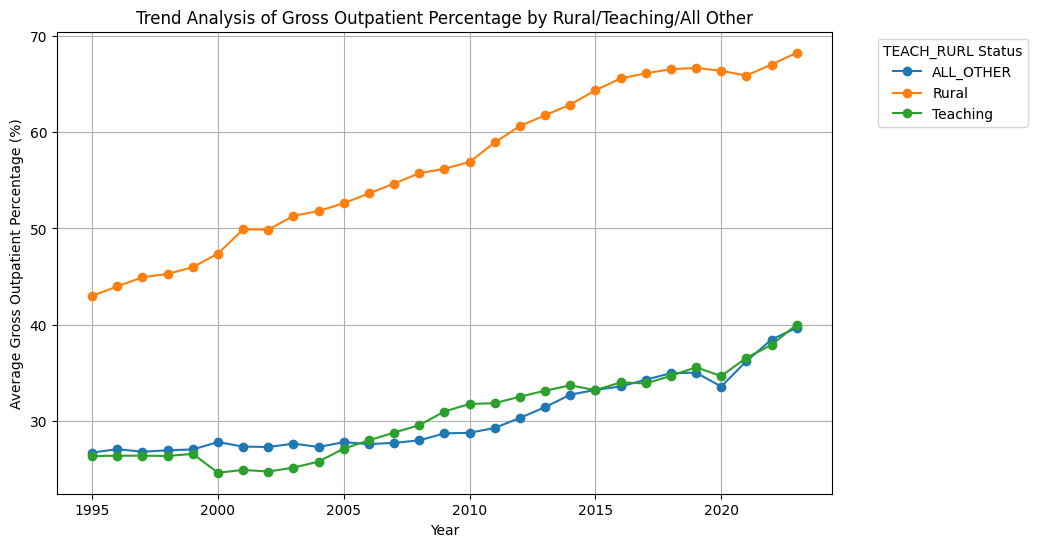

In [15]:
# Function to calculate the outpatient trend analysis by grouping by year and TEACH_RURL (Rural, N/A, Teaching)
def outpatient_trend_by_teach_rurl(df):
    """
    Perform trend analysis on the gross outpatient percentage by calculating
    the average outpatient percentage for each year and TEACH_RURL status.
    """
    # Fill NaN values in the 'TEACH_RURL' column with 'Missing' to handle them separately
    df['TEACH_RURL'] = df['TEACH_RURL'].fillna('ALL_OTHER')
    
    # Group by 'Year' and 'TEACH_RURL' and calculate the mean Gross_Outpatient_Percentage
    trend = df.groupby(['Year', 'TEACH_RURL'])['Gross_Outpatient_Percentage'].mean().reset_index()
    return trend

# Calculate the outpatient trend by TEACH_RURL
outpatient_trend_teach_rurl_df = outpatient_trend_by_teach_rurl(overall_trend_df)

# Determine the minimum and maximum year in the dataset for dynamic ticks
min_year = outpatient_trend_teach_rurl_df['Year'].min()
max_year = outpatient_trend_teach_rurl_df['Year'].max()

# Generate ticks every 5 years within the range of years
year_ticks = np.arange(min_year, max_year + 1, 5)

# Plot the outpatient trend for each TEACH_RURL category (Rural, Teaching, Missing) across the years
plt.figure(figsize=(10, 6))

# Plotting the trend for each TEACH_RURL category
for teach_rurl in outpatient_trend_teach_rurl_df['TEACH_RURL'].unique():
    # Filter the dataframe for the current TEACH_RURL category
    df_filtered = outpatient_trend_teach_rurl_df[outpatient_trend_teach_rurl_df['TEACH_RURL'] == teach_rurl]
    plt.plot(df_filtered['Year'], df_filtered['Gross_Outpatient_Percentage'], marker='o', linestyle='-', label=teach_rurl)

# Add plot details
plt.title('Trend Analysis of Gross Outpatient Percentage by Rural/Teaching/All Other')
plt.xlabel('Year')
plt.ylabel('Average Gross Outpatient Percentage (%)')
plt.xticks(year_ticks)  # Set the ticks to the dynamically generated years
plt.legend(title="TEACH_RURL Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Analysis 2: Trend Analysis of Gross Inpatient/Outpatient Percentage by Year and TEACH_RURL status

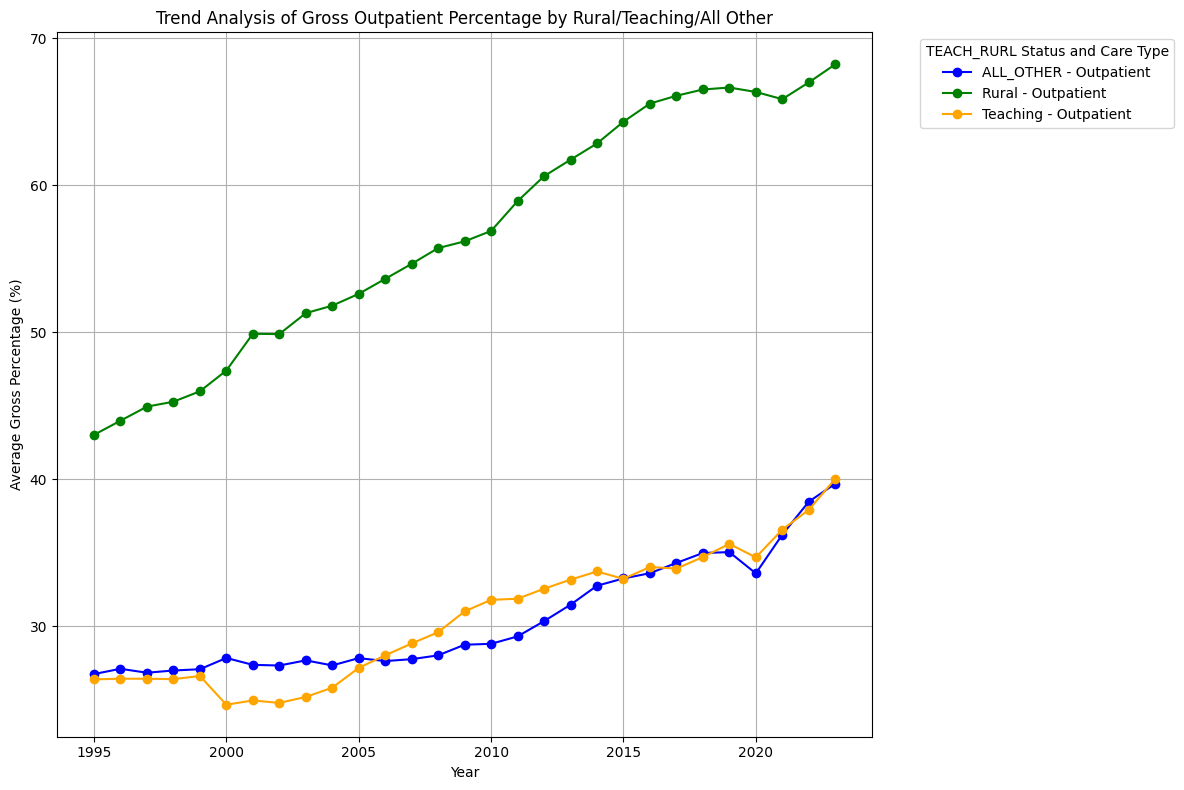

In [16]:
# Function to calculate both outpatient and inpatient trend analysis by grouping by year and TEACH_RURL (Rural, Teaching, All Other)
def trend_analysis_by_teach_rurl(df):
    """
    Perform trend analysis on the gross outpatient and inpatient percentages by calculating
    the average percentages for each year and TEACH_RURL status.
    """
    # Fill NaN values in the 'TEACH_RURL' column with 'ALL_OTHER' to handle them separately
    df['TEACH_RURL'] = df['TEACH_RURL'].fillna('ALL_OTHER')
    
    # Group by 'Year' and 'TEACH_RURL' and calculate the mean Gross_Outpatient_Percentage and Gross_Inpatient_Percentage
    trend = df.groupby(['Year', 'TEACH_RURL']).agg({
        'Gross_Outpatient_Percentage': 'mean',
        'Gross_Inpatient_Percentage': 'mean'
    }).reset_index()
    return trend

# Calculate the trend by TEACH_RURL for both outpatient and inpatient percentages
trend_teach_rurl_df = trend_analysis_by_teach_rurl(overall_trend_df)

# Determine the minimum and maximum year in the dataset for dynamic ticks
min_year = trend_teach_rurl_df['Year'].min()
max_year = trend_teach_rurl_df['Year'].max()

# Generate ticks every 5 years within the range of years
year_ticks = np.arange(min_year, max_year + 1, 5)

# Define colors for each TEACH_RURL category
colors = {
    'Rural': 'green',
    'ALL_OTHER': 'blue',
    'Teaching': 'orange'
}

# Plot the outpatient and inpatient trend for each TEACH_RURL category (Rural, Teaching, All Other) across the years
plt.figure(figsize=(12, 8))

# Plotting the trend for each TEACH_RURL category
for teach_rurl in trend_teach_rurl_df['TEACH_RURL'].unique():
    # Filter the dataframe for the current TEACH_RURL category
    df_filtered = trend_teach_rurl_df[trend_teach_rurl_df['TEACH_RURL'] == teach_rurl]
    
    # Get the color for the current TEACH_RURL category
    color = colors.get(teach_rurl, 'black')  # Default to black if not in the dictionary
    
    # Plot outpatient percentage trend
    plt.plot(df_filtered['Year'], df_filtered['Gross_Outpatient_Percentage'], marker='o', linestyle='-', color=color, label=f'{teach_rurl} - Outpatient')
    
    # Plot inpatient percentage trend
    #plt.plot(df_filtered['Year'], df_filtered['Gross_Inpatient_Percentage'], marker='x', linestyle='--', color=color, label=f'{teach_rurl} - Inpatient')
    
# Add plot details
plt.title('Trend Analysis of Gross Outpatient Percentage by Rural/Teaching/All Other')
plt.xlabel('Year')
plt.ylabel('Average Gross Percentage (%)')
plt.xticks(year_ticks)  # Set the ticks to the dynamically generated years
plt.legend(title="TEACH_RURL Status and Care Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Save the plot to a file (e.g., PNG format)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.savefig('outpatient_inpatient_trend.png', dpi=300, bbox_inches='tight')

# Show the plot (optional)
plt.show()

#### Inpatient and Outpatient Percentages for First Year (1995) and Last Year (2022) by TEACH_RURL (Rural, Teaching, All Other)

In [17]:
# Function to calculate both outpatient and inpatient trend analysis by grouping by year and TEACH_RURL (Rural, Teaching, All Other)
def trend_analysis_by_teach_rurl(df):
    """
    Perform trend analysis on the gross outpatient and inpatient percentages by calculating
    the average percentages for each year and TEACH_RURL status.
    """
    # Fill NaN values in the 'TEACH_RURL' column with 'ALL_OTHER' to handle them separately
    df['TEACH_RURL'] = df['TEACH_RURL'].fillna('ALL_OTHER')
    
    # Group by 'Year' and 'TEACH_RURL' and calculate the mean Gross_Outpatient_Percentage and Gross_Inpatient_Percentage
    trend = df.groupby(['Year', 'TEACH_RURL']).agg({
        'Gross_Outpatient_Percentage': 'mean',
        'Gross_Inpatient_Percentage': 'mean'
    }).reset_index()
    return trend

# Assuming the input dataframe is 'overall_trend_df', recreate the trend dataframe
trend_teach_rurl_df = trend_analysis_by_teach_rurl(overall_trend_df)

# Grouping data for first and last year trend comparison
first_year = trend_teach_rurl_df['Year'].min()
last_year = trend_teach_rurl_df['Year'].max()

# Filtering for the first and last year data
first_year_data = trend_teach_rurl_df[trend_teach_rurl_df['Year'] == first_year]
last_year_data = trend_teach_rurl_df[trend_teach_rurl_df['Year'] == last_year]

# Printing the percentages for the first year
print(f"--- Inpatient and Outpatient Percentages for First Year ({first_year}) ---")
for index, row in first_year_data.iterrows():
    print(f"Hospital Type: {row['TEACH_RURL']}")
    print(f"  Gross Outpatient Percentage: {row['Gross_Outpatient_Percentage']:.2f}%")
    print(f"  Gross Inpatient Percentage: {row['Gross_Inpatient_Percentage']:.2f}%")

# Printing the percentages for the last year
print(f"\n--- Inpatient and Outpatient Percentages for Last Year ({last_year}) ---")
for index, row in last_year_data.iterrows():
    print(f"Hospital Type: {row['TEACH_RURL']}")
    print(f"  Gross Outpatient Percentage: {row['Gross_Outpatient_Percentage']:.2f}%")
    print(f"  Gross Inpatient Percentage: {row['Gross_Inpatient_Percentage']:.2f}%")

--- Inpatient and Outpatient Percentages for First Year (1995) ---
Hospital Type: ALL_OTHER
  Gross Outpatient Percentage: 26.75%
  Gross Inpatient Percentage: 73.25%
Hospital Type: Rural
  Gross Outpatient Percentage: 43.02%
  Gross Inpatient Percentage: 56.98%
Hospital Type: Teaching
  Gross Outpatient Percentage: 26.38%
  Gross Inpatient Percentage: 73.62%

--- Inpatient and Outpatient Percentages for Last Year (2023) ---
Hospital Type: ALL_OTHER
  Gross Outpatient Percentage: 39.70%
  Gross Inpatient Percentage: 60.30%
Hospital Type: Rural
  Gross Outpatient Percentage: 68.23%
  Gross Inpatient Percentage: 31.77%
Hospital Type: Teaching
  Gross Outpatient Percentage: 40.03%
  Gross Inpatient Percentage: 59.97%


### Analysis 3: Trend Analysis of Gross Outpatient Percentage by DSH and Non-DSH

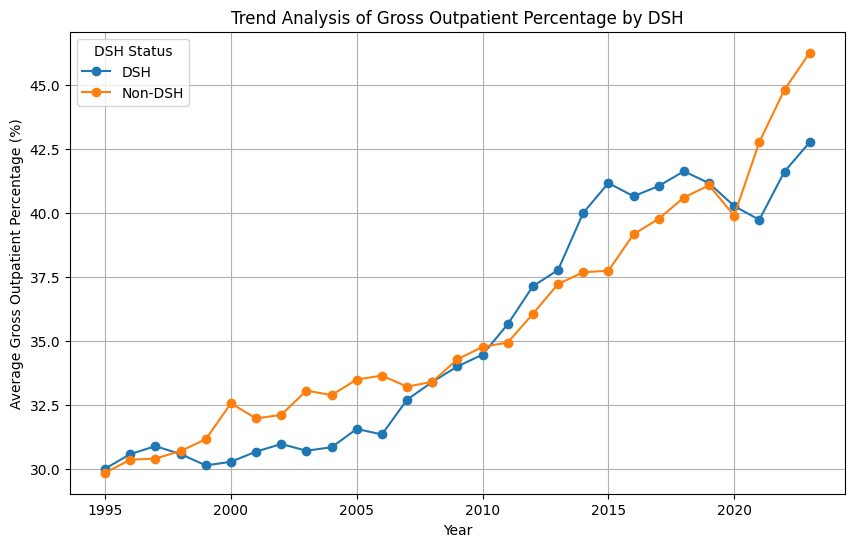

In [18]:
# Function to calculate the outpatient trend analysis by grouping by year and DSH status
def outpatient_trend_analysis_DSH(df):
    """
    Perform trend analysis on the gross outpatient percentage by calculating
    the average outpatient percentage for each year and DSH status.
    """
    # Group by 'Year' and 'DSH hosp' (DSH status), and calculate the mean Gross_Outpatient_Percentage
    trend = df.groupby(['Year', 'DSH hosp'])['Gross_Outpatient_Percentage'].mean().reset_index()
    return trend

# Assuming 'overall_trend_df' contains data with columns 'Year', 'DSH hosp', and 'Gross_Outpatient_Percentage'
outpatient_trend_df_DSH = outpatient_trend_analysis_DSH(overall_trend_df)

# Find the unique years in the data
unique_years = outpatient_trend_df_DSH['Year'].unique()
year_ticks = np.sort(unique_years)  # Sort the unique years for proper ordering

# Plot the outpatient trend for DSH and Non-DSH hospitals across the years
plt.figure(figsize=(10, 6))

# Generate ticks every 5 years within the range of years
year_ticks = np.arange(min_year, max_year + 1, 5)

# Separate the trends for DSH and Non-DSH hospitals
for dsh_status in outpatient_trend_df_DSH['DSH hosp'].unique():
    # Filter the dataframe for the current DSH status
    df_filtered = outpatient_trend_df_DSH[outpatient_trend_df_DSH['DSH hosp'] == dsh_status]
    plt.plot(df_filtered['Year'], df_filtered['Gross_Outpatient_Percentage'], marker='o', linestyle='-', label=dsh_status)

# Add plot details
plt.title('Trend Analysis of Gross Outpatient Percentage by DSH')
plt.xlabel('Year')
plt.ylabel('Average Gross Outpatient Percentage (%)')
plt.xticks(year_ticks) 
plt.legend(title="DSH Status")
plt.grid(True)
plt.show()

### Analysis 3: Trend Analysis of Gross Outpatient Percentage by DSH and Non-DSH for rural Hospitals

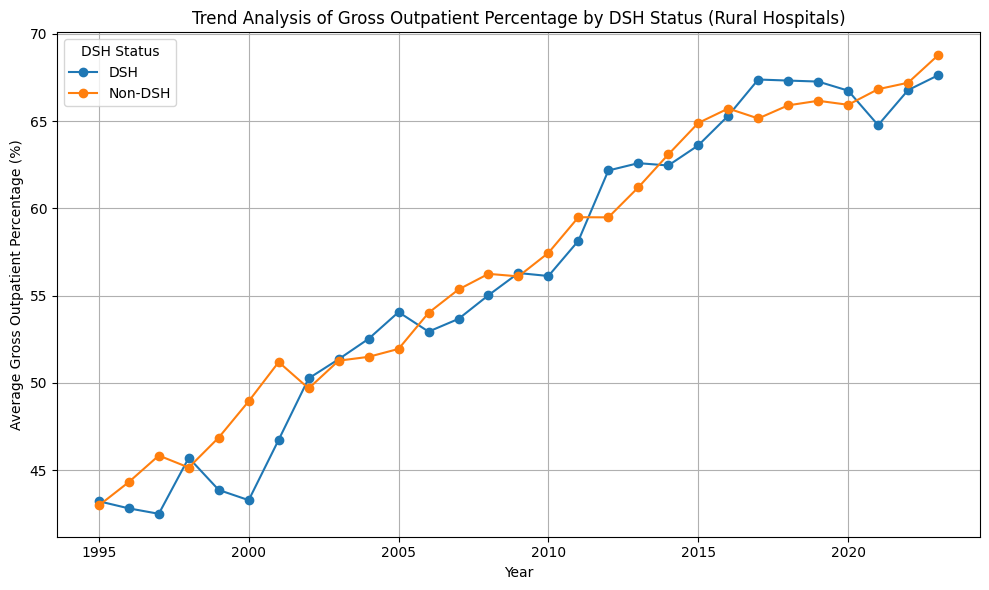

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for only rural hospitals from the overall_trend_df
rural_hospitals_df = overall_trend_df[overall_trend_df['TEACH_RURL'] == 'Rural']

# Function to calculate the outpatient trend analysis by grouping by year and DSH status
def outpatient_trend_analysis_DSH(df):
    """
    Perform trend analysis on the gross outpatient percentage by calculating
    the average outpatient percentage for each year and DSH status.
    """
    # Group by 'Year' and 'DSH hosp' (DSH status), and calculate the mean Gross_Outpatient_Percentage
    trend = df.groupby(['Year', 'DSH hosp'])['Gross_Outpatient_Percentage'].mean().reset_index()
    return trend

# Perform the analysis for rural hospitals by DSH status
outpatient_trend_df_DSH = outpatient_trend_analysis_DSH(rural_hospitals_df)

# Find the unique years in the data
unique_years = outpatient_trend_df_DSH['Year'].unique()
min_year = min(unique_years)
max_year = max(unique_years)
year_ticks = np.arange(min_year, max_year + 1, 5)  # Generate ticks every 5 years

# Plot the outpatient trend for DSH and Non-DSH hospitals across the years
plt.figure(figsize=(10, 6))

# Separate the trends for DSH and Non-DSH hospitals
for dsh_status in outpatient_trend_df_DSH['DSH hosp'].unique():
    # Filter the dataframe for the current DSH status
    df_filtered = outpatient_trend_df_DSH[outpatient_trend_df_DSH['DSH hosp'] == dsh_status]
    plt.plot(df_filtered['Year'], df_filtered['Gross_Outpatient_Percentage'], marker='o', linestyle='-', label=dsh_status)

# Add plot details
plt.title('Trend Analysis of Gross Outpatient Percentage by DSH Status (Rural Hospitals)')
plt.xlabel('Year')
plt.ylabel('Average Gross Outpatient Percentage (%)')
plt.xticks(year_ticks)
plt.legend(title="DSH Status")
plt.grid(True)
plt.tight_layout()
plt.savefig('Trend Analysis of Gross Outpatient Percentage by DSH Status for rural Hospitals.png', dpi=300, bbox_inches='tight')
plt.show()



In [20]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert Gross_Outpatient_Percentage to numeric, coercing errors to NaN
overall_trend_df['Gross_Outpatient_Percentage'] = pd.to_numeric(
    overall_trend_df['Gross_Outpatient_Percentage'], errors='coerce'
)

# Drop rows where Gross_Outpatient_Percentage is NaN
overall_trend_df = overall_trend_df.dropna(subset=['Gross_Outpatient_Percentage'])

# Rename columns to remove spaces for compatibility
overall_trend_df.rename(columns={
    'DSH hosp': 'DSH_hosp',
    'lic bed size': 'lic_bed_size',
    'TEACH_RURL': 'TEACH_RURL',
    'adj pat days': 'adj_pat_days'
}, inplace=True)

# Check for missing values and drop rows with NaNs
overall_trend_df = overall_trend_df.dropna(subset=['Gross_Outpatient_Percentage', 'DSH_hosp', 'lic_bed_size', 
                                                   'TEACH_RURL', 'adj_pat_days', 'DIS_TOT'])

# Convert specified variables to categorical types
categorical_vars = ['DSH_hosp', 'lic_bed_size', 'TEACH_RURL']
for var in categorical_vars:
    overall_trend_df[var] = overall_trend_df[var].astype('category')

# Define the regression formula excluding DAY_TOT
formula = "Gross_Outpatient_Percentage ~ C(DSH_hosp) + C(lic_bed_size) + C(TEACH_RURL) + adj_pat_days + DIS_TOT"

# Fit the regression model
model = smf.ols(formula=formula, data=overall_trend_df).fit()

# Print regression summary
print("Regression Results:")
print(model.summary())

# Multicollinearity Analysis
# Create design matrix with dummy variables
X = pd.get_dummies(overall_trend_df[['DSH_hosp', 'lic_bed_size', 'TEACH_RURL', 'adj_pat_days', 'DIS_TOT']], drop_first=True)

# Add a constant for the intercept
X = sm.add_constant(X)


Regression Results:
                                 OLS Regression Results                                
Dep. Variable:     Gross_Outpatient_Percentage   R-squared:                       0.399
Model:                                     OLS   Adj. R-squared:                  0.398
Method:                          Least Squares   F-statistic:                     600.5
Date:                         Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                                 17:25:41   Log-Likelihood:                -40110.
No. Observations:                         9963   AIC:                         8.024e+04
Df Residuals:                             9951   BIC:                         8.033e+04
Df Model:                                   11                                         
Covariance Type:                     nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----

/var/folders/cj/742s04b178ld3v0xjpn8xzt80000gn/T/ipykernel_10465/1758989337.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_trend_df.rename(columns={


In [21]:
# Filter the dataset for rural hospitals
rural_hospitals_df = overall_trend_df[overall_trend_df['TEACH_RURL'] == 'Rural']

# Define the regression formula
rural_formula = "Gross_Outpatient_Percentage ~ C(DSH_hosp) + C(lic_bed_size) + adj_pat_days + DIS_TOT"

# Fit the regression model for rural hospitals
rural_model = smf.ols(formula=rural_formula, data=rural_hospitals_df).fit()

# Print the summary of regression results
print("Regression Results for Rural Hospitals:")
print(rural_model.summary())

Regression Results for Rural Hospitals:
                                 OLS Regression Results                                
Dep. Variable:     Gross_Outpatient_Percentage   R-squared:                       0.340
Model:                                     OLS   Adj. R-squared:                  0.337
Method:                          Least Squares   F-statistic:                     125.0
Date:                         Fri, 15 Nov 2024   Prob (F-statistic):          4.12e-169
Time:                                 17:25:41   Log-Likelihood:                -7720.7
No. Observations:                         1952   AIC:                         1.546e+04
Df Residuals:                             1943   BIC:                         1.551e+04
Df Model:                                    8                                         
Covariance Type:                     nonrobust                                         
                                 coef    std err          t      P>|t|      [0.0

# Hospital Disappeared

In [22]:
# Create a function to find the last year each hospital appears
def find_disappeared_hospitals(df):
    # Group by facility and get the last year for each
    last_appearances = df.groupby('FAC_NO').agg({
        'Year': 'max',
        'FAC_NAME': 'last',
        'TYPE_CARE': 'last',
        'HSA name': 'last',
        'DSH_hosp': 'last',
        'lic_bed_size': 'last',
        'TEACH_RURL': 'last',
        'DAY_TOT': 'last',
        'adj_pat_days': 'last',
        'DIS_TOT': 'last',
        'county name': 'last',
        'COUNTY': 'last',
        'OSHPD_ID': 'last',
        'HOSPITAL': 'last',
        'FY_Score': 'last',
        'CY_Score': 'last',
        'Gross_Outpatient_Percentage': 'last',
        'Gross_Inpatient_Percentage': 'last'
    }).reset_index()
    
    # Rename Year column to Year_disappeared
    last_appearances = last_appearances.rename(columns={'Year': 'Year_disappeared'})
    
    # Filter for hospitals that disappeared before the last year in the dataset
    max_year = df['Year'].max()
    disappeared = last_appearances[last_appearances['Year_disappeared'] < max_year]
    
    # Sort by year disappeared
    disappeared = disappeared.sort_values('Year_disappeared', ascending=False)
    
    return disappeared

# Get disappeared hospitals
disappeared_hospitals = find_disappeared_hospitals(overall_trend_df)


# Display summary statistics of years when hospitals disappeared
print("\nSummary of years when hospitals disappeared:")
print(disappeared_hospitals['Year_disappeared'].value_counts().sort_index())


Summary of years when hospitals disappeared:
Year_disappeared
1995     5
1996    10
1997    10
1998    13
1999    14
2000     4
2001     3
2002     5
2003    11
2004    10
2005     5
2006     3
2007     6
2008     1
2009     5
2010     6
2011     2
2012     4
2013     5
2014     7
2015     3
2016     3
2017     1
2018     4
2019     6
2020     3
2021     4
2022     3
Name: count, dtype: int64


In [23]:
disappeared_hospitals

,FAC_NO,Year_disappeared,FAC_NAME,TYPE_CARE,HSA name,DSH_hosp,lic_bed_size,TEACH_RURL,DAY_TOT,adj_pat_days,DIS_TOT,county name,COUNTY,OSHPD_ID,HOSPITAL,FY_Score,CY_Score,Gross_Outpatient_Percentage,Gross_Inpatient_Percentage
185,106190857.0,2022,doctors hospital of west covina,GENERAL ACUTE,11 - los angeles county,DSH,50-99,ALL_OTHER,9904.0,14948.749555,346.0,LOS ANGELES,LOS ANGELES,190857.0,west covina medical center,1.277183,NaN,33.746967,66.253033
159,106190636.0,2022,citrus valley medical centerqv campus,GENERAL ACUTE,11 - los angeles county,DSH,500+,ALL_OTHER,136071.0,172823.851732,26914.0,LOS ANGELES,LOS ANGELES,190636.0,emanate health queen of the valley hospital,1.289117,NaN,21.266076,78.733924
291,106331288.0,2022,palo verde hospital,GENERAL ACUTE,12 - inland counties,DSH,50-99,Rural,2914.0,5377.369222,895.0,RIVERSIDE,RIVERSIDE,331288.0,palo verde hospital,0.900826,0.88,45.809933,54.190067
136,106190475.0,2021,community hospital of long beach,GENERAL ACUTE,11 - los angeles county,Non-DSH,200-299,ALL_OTHER,19435.0,29220.184461,3831.0,LOS ANGELES,LOS ANGELES,190475.0,community hospital long beach,1.297184,NaN,33.487757,66.512243
146,106190534.0,2021,olympia medical center,GENERAL ACUTE,11 - los angeles county,Non-DSH,200-299,ALL_OTHER,32746.0,42291.187709,5914.0,LOS ANGELES,LOS ANGELES,190534.0,olympia medical center,1.643256,1.31,22.570158,77.429842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,106130666.0,1995,calexico hospital,GENERAL ACUTE,None,Non-DSH,1-49,ALL_OTHER,1823.0,3481.978135,393.0,IMPERIAL,None,NaN,None,NaN,NaN,47.644703,52.355297
46,106100796.0,1995,sierra hospital fresno,GENERAL ACUTE,None,Non-DSH,50-99,ALL_OTHER,12588.0,17328.273151,2360.0,FRESNO,None,NaN,None,NaN,NaN,27.355716,72.644284
4,106010811.0,1995,alameda co med ctr fairmont campus,GENERAL ACUTE,None,DSH,200-299,ALL_OTHER,69457.0,89026.040220,1398.0,ALAMEDA,None,NaN,None,NaN,NaN,21.981254,78.018746
187,106190860.0,1995,west valley hospital,GENERAL ACUTE,None,Non-DSH,100-149,ALL_OTHER,8564.0,11639.281207,2079.0,LOS ANGELES,None,NaN,None,NaN,NaN,26.421573,73.578427


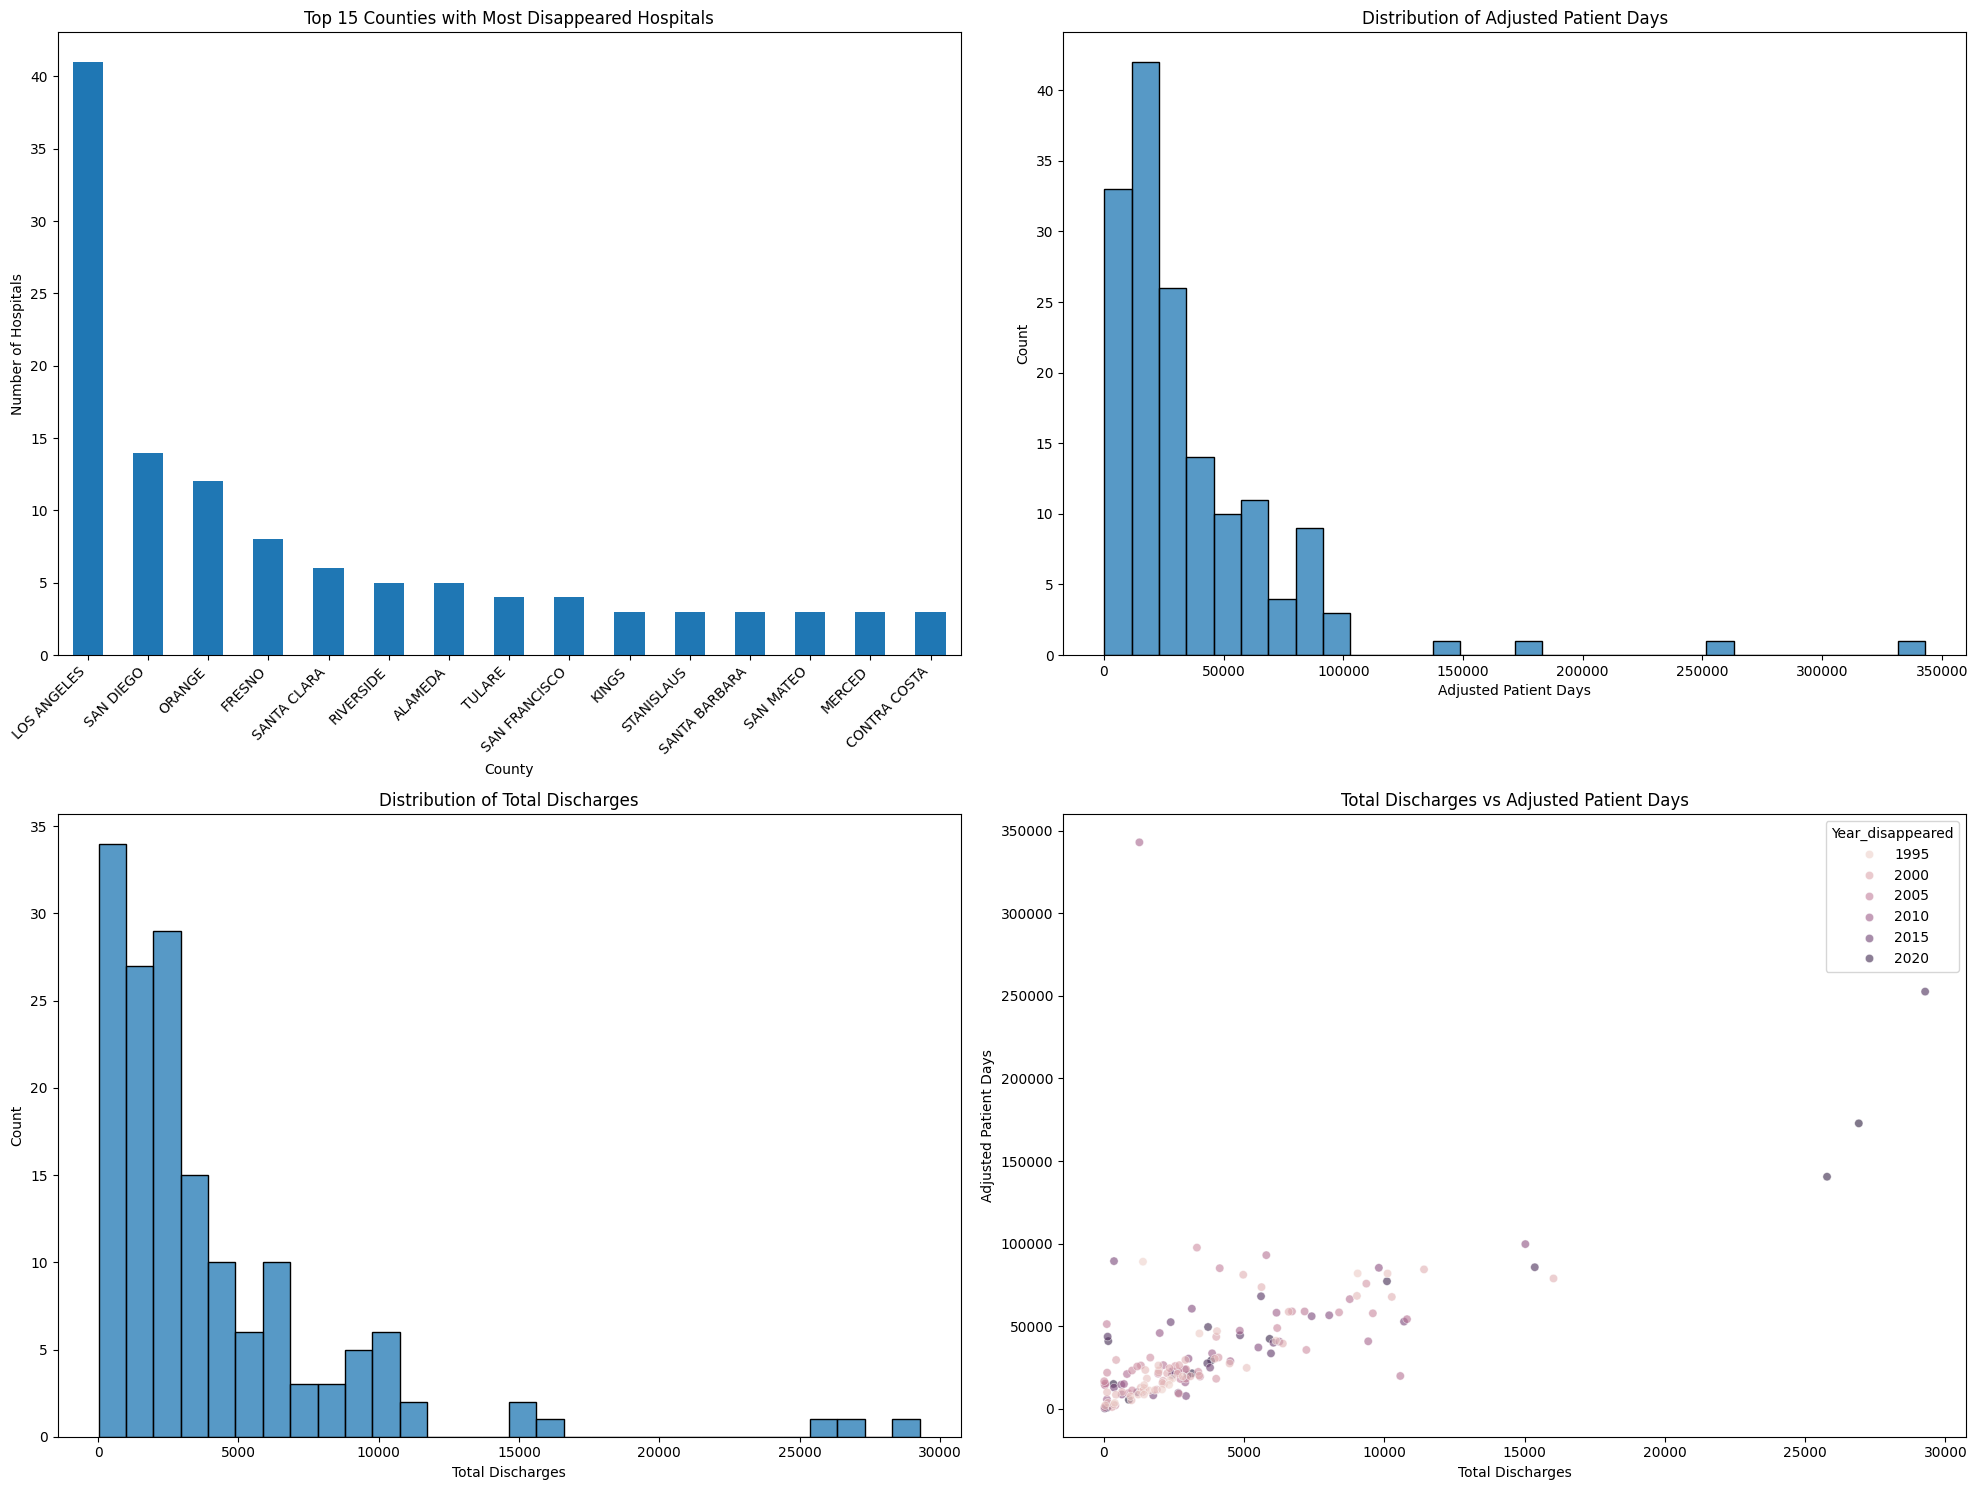

1. Top 5 Counties with Most Disappeared Hospitals:
             Count
county name       
LOS ANGELES     41
SAN DIEGO       14
ORANGE          12
FRESNO           8
SANTA CLARA      6
2. Summary Statistics for Adjusted Patient Days:
count       156.000000
mean      36717.611976
std       41407.687672
min         149.000000
25%       14249.428564
50%       23565.305793
75%       47640.861164
max      343054.000000
Name: adj_pat_days, dtype: float64
3. Summary Statistics for Total Discharges:
count      156.000000
mean      3976.608974
std       4659.636278
min         16.000000
25%       1259.750000
50%       2662.000000
75%       5199.000000
max      29279.000000
Name: DIS_TOT, dtype: float64
5. Yearly Trend of Hospital Disappearances:
Year_disappeared
1995     5
1996    10
1997    10
1998    13
1999    14
2000     4
2001     3
2002     5
2003    11
2004    10
2005     5
2006     3
2007     6
2008     1
2009     5
2010     6
2011     2
2012     4
2013     5
2014     7
2015     3
2016  

In [24]:
# 1. Regional Analysis
regional_counts = disappeared_hospitals.groupby(['county name', 'Year_disappeared']).size().unstack(fill_value=0)
total_by_county = regional_counts.sum(axis=1).sort_values(ascending=False)

# 2. Create visualizations
plt.figure(figsize=(20, 15))

# Plot 1: Regional Distribution (Top 15 counties)
plt.subplot(2, 2, 1)
total_by_county.head(15).plot(kind='bar')
plt.title('Top 15 Counties with Most Disappeared Hospitals')
plt.xlabel('County')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=45, ha='right')

# Plot 2: Distribution of Adjusted Patient Days
plt.subplot(2, 2, 2)
sns.histplot(data=disappeared_hospitals, x='adj_pat_days', bins=30)
plt.title('Distribution of Adjusted Patient Days')
plt.xlabel('Adjusted Patient Days')
plt.ylabel('Count')

# Plot 3: Distribution of Total Discharges
plt.subplot(2, 2, 3)
sns.histplot(data=disappeared_hospitals, x='DIS_TOT', bins=30)
plt.title('Distribution of Total Discharges')
plt.xlabel('Total Discharges')
plt.ylabel('Count')

# Plot 4: Scatter plot of Discharges vs Adjusted Days by Year
plt.subplot(2, 2, 4)
sns.scatterplot(data=disappeared_hospitals, 
                x='DIS_TOT', 
                y='adj_pat_days',
                hue='Year_disappeared',
                alpha=0.6)
plt.title('Total Discharges vs Adjusted Patient Days')
plt.xlabel('Total Discharges')
plt.ylabel('Adjusted Patient Days')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\
1. Top 5 Counties with Most Disappeared Hospitals:")
print(total_by_county.head().to_frame('Count'))

print("\
2. Summary Statistics for Adjusted Patient Days:")
print(disappeared_hospitals['adj_pat_days'].describe())

print("\
3. Summary Statistics for Total Discharges:")
print(disappeared_hospitals['DIS_TOT'].describe())

# Additional analysis: Size distribution
if 'lic bed size' in disappeared_hospitals.columns:
    print("\
4. Hospital Size Distribution:")
    print(disappeared_hospitals['lic_bed_size'].value_counts().sort_index())

# Time trend analysis
yearly_counts = disappeared_hospitals['Year_disappeared'].value_counts().sort_index()
print("\
5. Yearly Trend of Hospital Disappearances:")
print(yearly_counts)

# Calculate correlation between size metrics
correlation = disappeared_hospitals['DIS_TOT'].corr(disappeared_hospitals['adj_pat_days'])
print("\
6. Correlation between Total Discharges and Adjusted Patient Days:", correlation)

# Optional: Teaching/Rural Status if available
if 'TEACH_RURL' in disappeared_hospitals.columns:
    print("\
7. Teaching/Rural Status Distribution:")
    print(disappeared_hospitals['TEACH_RURL'].value_counts())

### Rural hospitals at 2023 in-depth analysis 


In [28]:
def filter_rural_hospitals_2023(df):
    """
    Filter the dataframe to include only rural hospitals in the year 2023 and select specific columns:
    - lic bed size
    - DAY_TOT
    - adj pat days
    - DIS_TOT
    - DSH hosp
    - FAC_NO
    - FAC_NAME
    """
    # Filter for rural hospitals and the year 2023
    rural_hospitals_2023 = df[(df['TEACH_RURL'] == 'Rural') & (df['Year'] == 2023)]
    
    # Select the required columns
    rural_hospitals_selected = rural_hospitals_2023[['lic_bed_size', 'DAY_TOT', 'adj_pat_days', 'DIS_TOT', 'DSH_hosp', 'FAC_NO', 'FAC_NAME']]
    
    return rural_hospitals_selected

# Assuming 'overall_trend_df' is your dataframe
rural_hospitals_df_2023 = filter_rural_hospitals_2023(overall_trend_df)

# Save the filtered rural hospitals for 2023 to a CSV file
rural_hospitals_df_2023.to_csv('descriptive table Issue Brief/rural_hospitals_details_2023.csv', index=False)

# Save the filtered rural hospitals for 2023 to an Excel file
rural_hospitals_df_2023.to_excel('descriptive table Issue Brief/rural_hospitals_details_2023.xlsx', index=False)

# Optionally display the DataFrame to ensure the output
print(rural_hospitals_df_2023.head())

     lic_bed_size  DAY_TOT  adj_pat_days  DIS_TOT DSH_hosp       FAC_NO  \
2606        50-99   9481.0  24454.423010   2336.0      DSH  106034002.0   
2607         1-49   3805.0  20050.535619    470.0  Non-DSH  106040802.0   
2610         1-49   2928.0  10201.435906    801.0  Non-DSH  106050932.0   
2611         1-49   6152.0  20196.557634    724.0  Non-DSH  106060870.0   
2619         1-49   8896.0  26010.060968   2023.0      DSH  106084001.0   

                       FAC_NAME  
2606     sutter amador hospital  
2607           orchard hospital  
2610  mark twain medical center  
2611      colusa medical center  
2619      sutter coast hospital  


#### descriptive data of 2023 rural hospital

In [ ]:
rural_hospitals_df_2023_descriptive = rural_hospitals_df_2023[['DAY_TOT', 'adj pat days', 'DIS_TOT']].describe()

# Round the numbers to two decimal places
rural_hospitals_df_2023_descriptive = rural_hospitals_df_2023_descriptive.round(2)

# Display the rounded descriptive statistics
print(rural_hospitals_df_2023_descriptive)
#rural_hospitals_df_2023_descriptive.to_csv('rural_hospitals_2023_descriptive.csv', index=False)
#rural_hospitals_df_2023_descriptive.to_excel('rural_hospitals_df_2023_descriptive.xlsx', index=False)

In [ ]:
print(rural_hospitals_df_2023['DSH hosp'].value_counts())  # Distribution of DSH and non-DSH hospitals

#### other analysis

In [ ]:
# Histogram for bed sizes
rural_hospitals_df['lic bed size'].hist(bins=20)
plt.title('Distribution of Licensed Bed Sizes')
plt.xlabel('Bed Size')
plt.ylabel('Frequency')
plt.show()

# Bar plot for DSH vs Non-DSH hospitals - Average discharges
rural_hospitals_df.groupby('DSH hosp')['DIS_TOT'].mean().plot(kind='bar')
plt.title('Average Discharges by DSH Status')
plt.ylabel('Average Discharges')
plt.show()

#### plot 1: Adjusted Patient Days vs DIS_TOT and plot 2: Total Patient Days vs DIS_TOT categorized on bed size 

In [ ]:
# Define a color palette for bed size categories using the 'tab10' palette for distinct colors
palette = sns.color_palette("tab10", n_colors=rural_hospitals_df_2023['lic bed size'].nunique())

# Create a dictionary to map bed size categories to colors
bed_size_colors = dict(zip(rural_hospitals_df_2023['lic bed size'].unique(), palette))

# Create custom legend handles for the plot
legend_handles = [mpatches.Patch(color=color, label=bed_size) for bed_size, color in bed_size_colors.items()]

# Scatter plot 1: Adjusted Patient Days vs DIS_TOT, colored by 'lic bed size'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rural_hospitals_df_2023['DIS_TOT'], rural_hospitals_df_2023['adj pat days'], 
                      c=rural_hospitals_df_2023['lic bed size'].map(bed_size_colors), alpha=0.7)
plt.title('Adjusted Patient Days vs Total Discharges (Colored by Bed Size)')
plt.xlabel('Total Discharges (DIS_TOT)')
plt.ylabel('Adjusted Patient Days (adj pat days)')
plt.legend(handles=legend_handles, title='Bed Size Category')
plt.show()

# Scatter plot 2: Total Patient Days vs DIS_TOT, colored by 'lic bed size'
plt.figure(figsize=(10, 6))
scatter = plt.scatter(rural_hospitals_df_2023['DIS_TOT'], rural_hospitals_df_2023['DAY_TOT'], 
                      c=rural_hospitals_df_2023['lic bed size'].map(bed_size_colors), alpha=0.7)
plt.title('Total Patient Days vs Total Discharges (Colored by Bed Size)')
plt.xlabel('Total Discharges (DIS_TOT)')
plt.ylabel('Total Patient Days (DAY_TOT)')
plt.legend(handles=legend_handles, title='Bed Size Category')
plt.show()

 #### remove outliers

In [ ]:
# Filter out the two outliers with bed size 200-299
rural_hospitals_no_outliers_2023 = rural_hospitals_df_2023[rural_hospitals_df_2023['lic bed size'] != '200-299']

# Perform descriptive statistics again after removing the outliers
rural_hospitals_no_outliers_2023_descriptive = rural_hospitals_no_outliers_2023[['DAY_TOT', 'adj pat days', 'DIS_TOT']].describe()

# Round the numbers to two decimal places
rural_hospitals_no_outliers_2023_descriptive = rural_hospitals_no_outliers_2023_descriptive.round(2)

# Optionally display the DataFrame
print(rural_hospitals_no_outliers_2023_descriptive)

In [ ]:
# Revised code to plot scatter plots with y=x line (no regression line) and exclude bed size category '200-299'

# Filter out the outliers with bed sizes in the '200-299' category
filtered_df = rural_hospitals_df_2023[rural_hospitals_df_2023['lic bed size'] != '200-299']

# Re-create the color mapping and legend handles for the filtered data
palette = sns.color_palette("tab10", n_colors=filtered_df['lic bed size'].nunique())
bed_size_colors = dict(zip(filtered_df['lic bed size'].unique(), palette))
legend_handles = [mpatches.Patch(color=color, label=bed_size) for bed_size, color in bed_size_colors.items()]

# Scatter plot 1: Adjusted Patient Days vs DIS_TOT, colored by 'lic bed size'
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['DIS_TOT'], filtered_df['adj pat days'], 
            c=filtered_df['lic bed size'].map(bed_size_colors), alpha=0.7)
plt.title('Adjusted Patient Days vs Total Discharges (Excluding Bed Size 200-299)')
plt.xlabel('Total Discharges (DIS_TOT)')
plt.ylabel('Adjusted Patient Days (adj pat days)')
plt.legend(handles=legend_handles, title='Bed Size Category')

# Draw y=x line
max_val = max(filtered_df['DIS_TOT'].max(), filtered_df['adj pat days'].max())
plt.plot([0, max_val], [0, max_val], color="gray", linestyle="--", label="y=x")

plt.show()

# Scatter plot 2: Total Patient Days vs DIS_TOT, colored by 'lic bed size'
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['DIS_TOT'], filtered_df['DAY_TOT'], 
            c=filtered_df['lic bed size'].map(bed_size_colors), alpha=0.7)
plt.title('Total Patient Days vs Total Discharges (Excluding Bed Size 200-299)')
plt.xlabel('Total Discharges (DIS_TOT)')
plt.ylabel('Total Patient Days (DAY_TOT)')
plt.legend(handles=legend_handles, title='Bed Size Category')

# Draw y=x line
max_val = max(filtered_df['DIS_TOT'].max(), filtered_df['DAY_TOT'].max())
plt.plot([0, max_val], [0, max_val], color="gray", linestyle="--", label="y=x")

plt.show()

# Urban VS Rural

In [ ]:
# Reclassify TEACH_RURL values
overall_trend_df['Hospital_Type'] = overall_trend_df['TEACH_RURL'].replace({
    'ALL_OTHER': 'Urban',
    'Rural': 'Rural',
    'Teaching': 'Exclude'  # Exclude 'Teaching' hospitals for this analysis
})

# Filter out 'Teaching' hospitals
filtered_df = overall_trend_df[overall_trend_df['Hospital_Type'] != 'Exclude']

# Group by Year and Hospital_Type to calculate average outpatient percentages
grouped_data = filtered_df.groupby(['Year', 'Hospital_Type'])['Gross_Outpatient_Percentage'].mean().reset_index()

# Pivot data for plotting
pivot_data = grouped_data.pivot(index='Year', columns='Hospital_Type', values='Gross_Outpatient_Percentage')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(pivot_data.index, pivot_data['Urban'], label='Urban', marker='o', color='blue')
plt.plot(pivot_data.index, pivot_data['Rural'], label='Rural', marker='o', color='green')

plt.title("Urban vs. Rural: Average Gross Outpatient Percentage (1995–2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Gross Outpatient Percentage", fontsize=12)
plt.legend(title="Hospital Type")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
overall_trend_df.columns

### Analysis 4: Trend Analysis of Gross Outpatient Percentage by Region (HSA)

In [ ]:
# Function to calculate the outpatient trend analysis by grouping by year and HSA name (region)
def outpatient_trend_by_hsa(df):
    """
    Perform trend analysis on the gross outpatient percentage by calculating
    the average outpatient percentage for each year and HSA name.
    """
    # Group by 'Year' and 'HSA name' and calculate the mean Gross_Outpatient_Percentage
    trend = df.groupby(['Year', 'HSA name'])['Gross_Outpatient_Percentage'].mean().reset_index()
    return trend

# Assuming 'overall_trend_df' contains data with columns 'Year', 'HSA name', and 'Gross_Outpatient_Percentage'
outpatient_trend_hsa_df = outpatient_trend_by_hsa(overall_trend_df)

# Plot the outpatient trend for each HSA (region) across the years
plt.figure(figsize=(14, 7))

# Plotting the trend for each HSA name (region)
for hsa_name in outpatient_trend_hsa_df['HSA name'].unique():
    # Filter the dataframe for the current HSA name (region)
    df_filtered = outpatient_trend_hsa_df[outpatient_trend_hsa_df['HSA name'] == hsa_name]
    plt.plot(df_filtered['Year'], df_filtered['Gross_Outpatient_Percentage'], marker='o', linestyle='-', label=hsa_name)

# Add plot details
plt.title('Trend Analysis of Gross Outpatient Percentage by HSA (Region)')
plt.xlabel('Year')
plt.ylabel('Average Gross Outpatient Percentage (%)')

# Set xticks dynamically based on unique years in the dataset
plt.xticks(sorted(overall_trend_df['Year'].unique()))

# Display legend outside of the plot
plt.legend(title="HSA (Region)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()

### Analysis 5: Trend Analysis of Gross Outpatient Percentage by DSH and Non-DSH for rural Hospitals 

In [ ]:
import matplotlib.pyplot as plt

# Filter for only rural hospitals from the overall_trend_df
rural_hospitals_df = overall_trend_df[overall_trend_df['TEACH_RURL'] == 'Rural']

# Function to calculate the outpatient trend analysis by grouping by year and HSA name (region)
def outpatient_trend_by_hsa(df):
    """
    Perform trend analysis on the gross outpatient percentage by calculating
    the average outpatient percentage for each year and HSA name.
    """
    # Group by 'Year' and 'HSA name' and calculate the mean Gross_Outpatient_Percentage
    trend = df.groupby(['Year', 'HSA name'])['Gross_Outpatient_Percentage'].mean().reset_index()
    return trend

# Perform the analysis for rural hospitals by HSA name (region)
outpatient_trend_hsa_df = outpatient_trend_by_hsa(rural_hospitals_df)

# Plot the outpatient trend for each HSA (region) across the years for rural hospitals
plt.figure(figsize=(14, 7))

# Plotting the trend for each HSA name (region)
for hsa_name in outpatient_trend_hsa_df['HSA name'].unique():
    # Filter the dataframe for the current HSA name (region)
    df_filtered = outpatient_trend_hsa_df[outpatient_trend_hsa_df['HSA name'] == hsa_name]
    plt.plot(df_filtered['Year'], df_filtered['Gross_Outpatient_Percentage'], marker='o', linestyle='-', label=hsa_name)

# Add plot details
plt.title('Trend Analysis of Gross Outpatient Percentage by HSA (Region) - Rural Hospitals')
plt.xlabel('Year')
plt.ylabel('Average Gross Outpatient Percentage (%)')

# Set xticks dynamically based on unique years in the dataset
plt.xticks(sorted(rural_hospitals_df['Year'].unique()))

# Display legend outside of the plot
plt.legend(title="HSA (Region)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Filter for only rural hospitals and specific HSA name '01 - NORTHERN CALIFORNIA' from the overall_trend_df
rural_hospitals_df_northern = overall_trend_df[(overall_trend_df['TEACH_RURL'] == 'Rural') & 
                                      (overall_trend_df['HSA name'] == '01 - NORTHERN CALIFORNIA')]

# Function to calculate the outpatient trend analysis by grouping by year and lic bed size
def outpatient_trend_by_bed_size(df):
    """
    Perform trend analysis on the gross outpatient percentage by calculating
    the average outpatient percentage for each year and lic bed size.
    """
    # Group by 'Year' and 'lic bed size' and calculate the mean Gross_Outpatient_Percentage
    trend = df.groupby(['Year', 'lic bed size'])['Gross_Outpatient_Percentage'].mean().reset_index()
    return trend

# Perform the analysis for rural hospitals by lic bed size
outpatient_trend_bed_size_df = outpatient_trend_by_bed_size(rural_hospitals_df)

# Plot the outpatient trend for each lic bed size category across the years
plt.figure(figsize=(14, 7))

# Plotting the trend for each 'lic bed size' category
for bed_size in outpatient_trend_bed_size_df['lic bed size'].unique():
    # Filter the dataframe for the current lic bed size category
    df_filtered = outpatient_trend_bed_size_df[outpatient_trend_bed_size_df['lic bed size'] == bed_size]
    plt.plot(df_filtered['Year'], df_filtered['Gross_Outpatient_Percentage'], marker='o', linestyle='-', label=bed_size)

# Add plot details
plt.title('Trend Analysis of Gross Outpatient Percentage by Licensed Bed Size (Rural Hospitals in Northern California)')
plt.xlabel('Year')
plt.ylabel('Average Gross Outpatient Percentage (%)')

# Set xticks dynamically based on unique years in the dataset
plt.xticks(sorted(rural_hospitals_df['Year'].unique()))

# Display legend outside of the plot
plt.legend(title="Licensed Bed Size", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()  # Adjust layout to make space for the legend
plt.show()

In [ ]:
rural_hospitals_df_northern

In [ ]:
# Filter for only rural hospitals
rural_hospitals_df = overall_trend_df[overall_trend_df['TEACH_RURL'] == 'Rural']

# Group by 'HSA name' and find unique values of 'lic bed size' for each region
for region, group in rural_hospitals_df.groupby('HSA name'):
    unique_lic_bed_size = group['lic bed size'].unique()
    print(f"Unique values in 'lic bed size' column for region {region}:")
    print(unique_lic_bed_size)
    print()  # Just for better formatting between regions

In [ ]:
# Export the overall_trend_df to CSV
overall_trend_df.to_csv('overall_trend.csv', index=False)

In [ ]:
# import geopandas as gpd
# california_counties = gpd.read_file("/Users/twylazhang/Desktop/Econ_Health_Research/ca_counties/CA_Counties.shp")
# #california_counties



In [ ]:
# import pandas as pd
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# from adjustText import adjust_text

# # Filter `overall_trend_df` for rural hospitals in the year 2023
# overall_trend_df = overall_trend_df[(overall_trend_df['Year'] == 2023) & (overall_trend_df['TEACH_RURL'] == 'Rural')]

# # Remove rows with missing county names in `overall_trend_df`
# overall_trend_df = overall_trend_df[~overall_trend_df['county name'].isna()]

# # Standardize county names in both dataframes for consistent merging
# california_counties['name'] = california_counties['name'].str.strip().str.lower()
# overall_trend_df['county name'] = overall_trend_df['county name'].str.strip().str.lower()

# # Handle multipart geometries by exploding them into single geometries
# california_counties = california_counties.explode(index_parts=True).reset_index(drop=True)

# # Validate geometries and repair invalid ones if needed
# california_counties['geometry'] = california_counties['geometry'].apply(
#     lambda geom: geom if geom.is_valid else geom.buffer(0)
# )

# # Merge to include `HSA name` and growth data in California counties, ensuring one entry per county
# california_counties = california_counties.merge(
#     overall_trend_df[['county name', 'HSA name', 'Gross_Outpatient_Percentage']].drop_duplicates(),
#     left_on='name',
#     right_on='county name',
#     how='left'
# )

# # Resolve duplicate column names if they exist
# california_counties = california_counties.rename(columns={
#     'HSA name_y': 'HSA name',
#     'Gross_Outpatient_Percentage_y': 'Gross_Outpatient_Percentage'
# }).drop(columns=['HSA name_x', 'Gross_Outpatient_Percentage_x'], errors='ignore')

# # Remove rows without matching HSA name in `california_counties`
# california_counties = california_counties[~california_counties['HSA name'].isna()]

# # Add centroids for counties
# california_counties['centroid'] = california_counties.geometry.centroid

# # Merge centroids back into `overall_trend_df` (only for relevant year and rural hospitals)
# overall_trend_df = overall_trend_df.merge(
#     california_counties[['name', 'centroid']],
#     left_on='county name',
#     right_on='name',
#     how='left'
# )

# # Remove rows with missing centroids
# overall_trend_df = overall_trend_df[~overall_trend_df['centroid'].isna()]

# # Define color mapping based on growth rate
# def color_by_growth_and_hsa(growth_rate, hsa_name):
#     if growth_rate > 15:
#         return 'red' if hsa_name == 'Region 1' else 'blue'  # High growth gets more saturated colors
#     else:
#         return 'lightgray'  # Low growth is muted

# # Apply the color mapping
# california_counties['region_color'] = california_counties.apply(
#     lambda row: color_by_growth_and_hsa(row['Gross_Outpatient_Percentage'], row['HSA name']), axis=1
# )

# # Extract longitude and latitude from the centroid geometry
# overall_trend_df['longitude'] = overall_trend_df['centroid'].apply(lambda x: x.x if x else None)
# overall_trend_df['latitude'] = overall_trend_df['centroid'].apply(lambda x: x.y if x else None)

# # Plotting setup
# fig, ax = plt.subplots(figsize=(14, 14))

# # Plot California counties with color-coded regions
# county_plot = california_counties.plot(
#     color=california_counties['region_color'], 
#     ax=ax, edgecolor='black', alpha=0.6
# )

# # Add legend for high-growth and low-growth regions
# growth_legend_patches = [
#     mpatches.Patch(color='red', label='High Growth Region (>15%)'),
#     mpatches.Patch(color='lightgray', label='Low Growth Region (<=15%)')
# ]
# plt.legend(handles=growth_legend_patches, title="Growth Rate", loc='upper left', bbox_to_anchor=(1.05, 1))

# # Plot hospital points only, without labels
# for idx, row in overall_trend_df.iterrows():
#     ax.scatter(row['longitude'], row['latitude'], color='black', s=50, alpha=0.7, edgecolor='white')

# # Set title and show plot
# ax.set_title("Rural Hospitals in California (2023) with Growth Rate-Based Color Coding", fontsize=16)
# ax.axis('off')
# plt.show()

In [ ]:
california_counties

In [ ]:
# # Check for duplicate centroids in the merged data
# duplicates = overall_trend_df[overall_trend_df.duplicated(subset=['centroid', 'county name'], keep=False)]
# print("Duplicate rows pointing to the same centroid:", duplicates)

In [ ]:
# import pandas as pd
# import geopandas as gpd
# import numpy as np
# import folium
# from folium.plugins import MarkerCluster

# # Filter and clean the data for 2023 rural hospitals
# overall_trend_df = overall_trend_df[(overall_trend_df['Year'] == 2023) & (overall_trend_df['TEACH_RURL'] == 'Rural')]
# overall_trend_df = overall_trend_df[~overall_trend_df['county name'].isna()]

# # Convert bed size ranges to numeric midpoints
# def convert_bed_size(bed_size):
#     if pd.isna(bed_size):
#         return np.nan
#     elif '-' in bed_size:
#         lower, upper = bed_size.split('-')
#         return (int(lower) + int(upper)) / 2
#     elif bed_size == '500+':
#         return 500  # Max value
#     else:
#         return int(bed_size)

# overall_trend_df['lic bed size'] = overall_trend_df['lic bed size'].apply(convert_bed_size)

# # Aggregate data to the county level
# county_summary = overall_trend_df.groupby(['county name', 'centroid']).agg({
#     'Gross_Outpatient_Percentage': 'mean',
#     'lic bed size': 'mean',  # Now numeric
#     'FAC_NAME': 'count'
# }).reset_index()
# county_summary.rename(columns={'FAC_NAME': 'Hospital_Count'}, inplace=True)

# # Initialize the Folium map centered around California
# m = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# # Create a marker cluster
# marker_cluster = MarkerCluster().add_to(m)

# # Add markers to the map
# for idx, row in county_summary.iterrows():
#     latitude = row['centroid'].y
#     longitude = row['centroid'].x
    
#     popup_content = f"""
#     <strong>County:</strong> {row['county name'].capitalize()}<br>
#     <strong>Average Gross Outpatient %:</strong> {row['Gross_Outpatient_Percentage']:.2f}%<br>
#     <strong>Average Licensed Bed Size:</strong> {row['lic bed size']:.2f}<br>
#     <strong>Number of Hospitals:</strong> {row['Hospital_Count']}<br>
#     """
    
#     folium.Marker(
#         location=[latitude, longitude],
#         popup=folium.Popup(popup_content, max_width=300),
#         tooltip=row['county name'].capitalize(),
#         icon=folium.Icon(color="blue", icon="info-sign")
#     ).add_to(marker_cluster)

# # Save the map to an HTML file
# m.save("california_rural_hospitals_map.html")
# m